In [1]:
import os
PATH="D:\SAP"
def total_files(folder_path):
    #num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    num_files = os.path.join(PATH, 'D:\\SAP')
    return num_files

train_files_healthy = "D:\\SAP\\Train\\Healthy"
train_files_powdery = "D:\\SAP\\Train\\Powdery"
train_files_rust = "D:\\SAP\\Train\\Rust"

test_files_healthy = "D:\\SAP\\test\\test\\Healthy"
test_files_powdery = "D:\\SAP\\test\\test\\Powdery"
test_files_rust = "D:\\SAP\\test\\test\\Rust"

valid_files_healthy = "D:\\SAP\\Validation\\Healthy"
valid_files_powdery = "D:\\SAP\\Validation\\Powdery"
valid_files_rust = "D:\\SAP\\Validation\\Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set D:\SAP
Number of powder leaf images in training set D:\SAP
Number of rusty leaf images in training set D:\SAP
Number of healthy leaf images in test set D:\SAP
Number of powder leaf images in test set D:\SAP
Number of rusty leaf images in test set D:\SAP
Number of healthy leaf images in validation set D:\SAP
Number of powder leaf images in validation set D:\SAP
Number of rusty leaf images in validation set D:\SAP


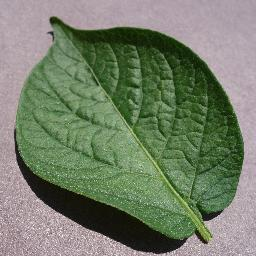

In [2]:
from PIL import Image
import IPython.display as display

image_path = 'D:\\SAP\\test\\test\\PotatoHealthy1.JPG'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

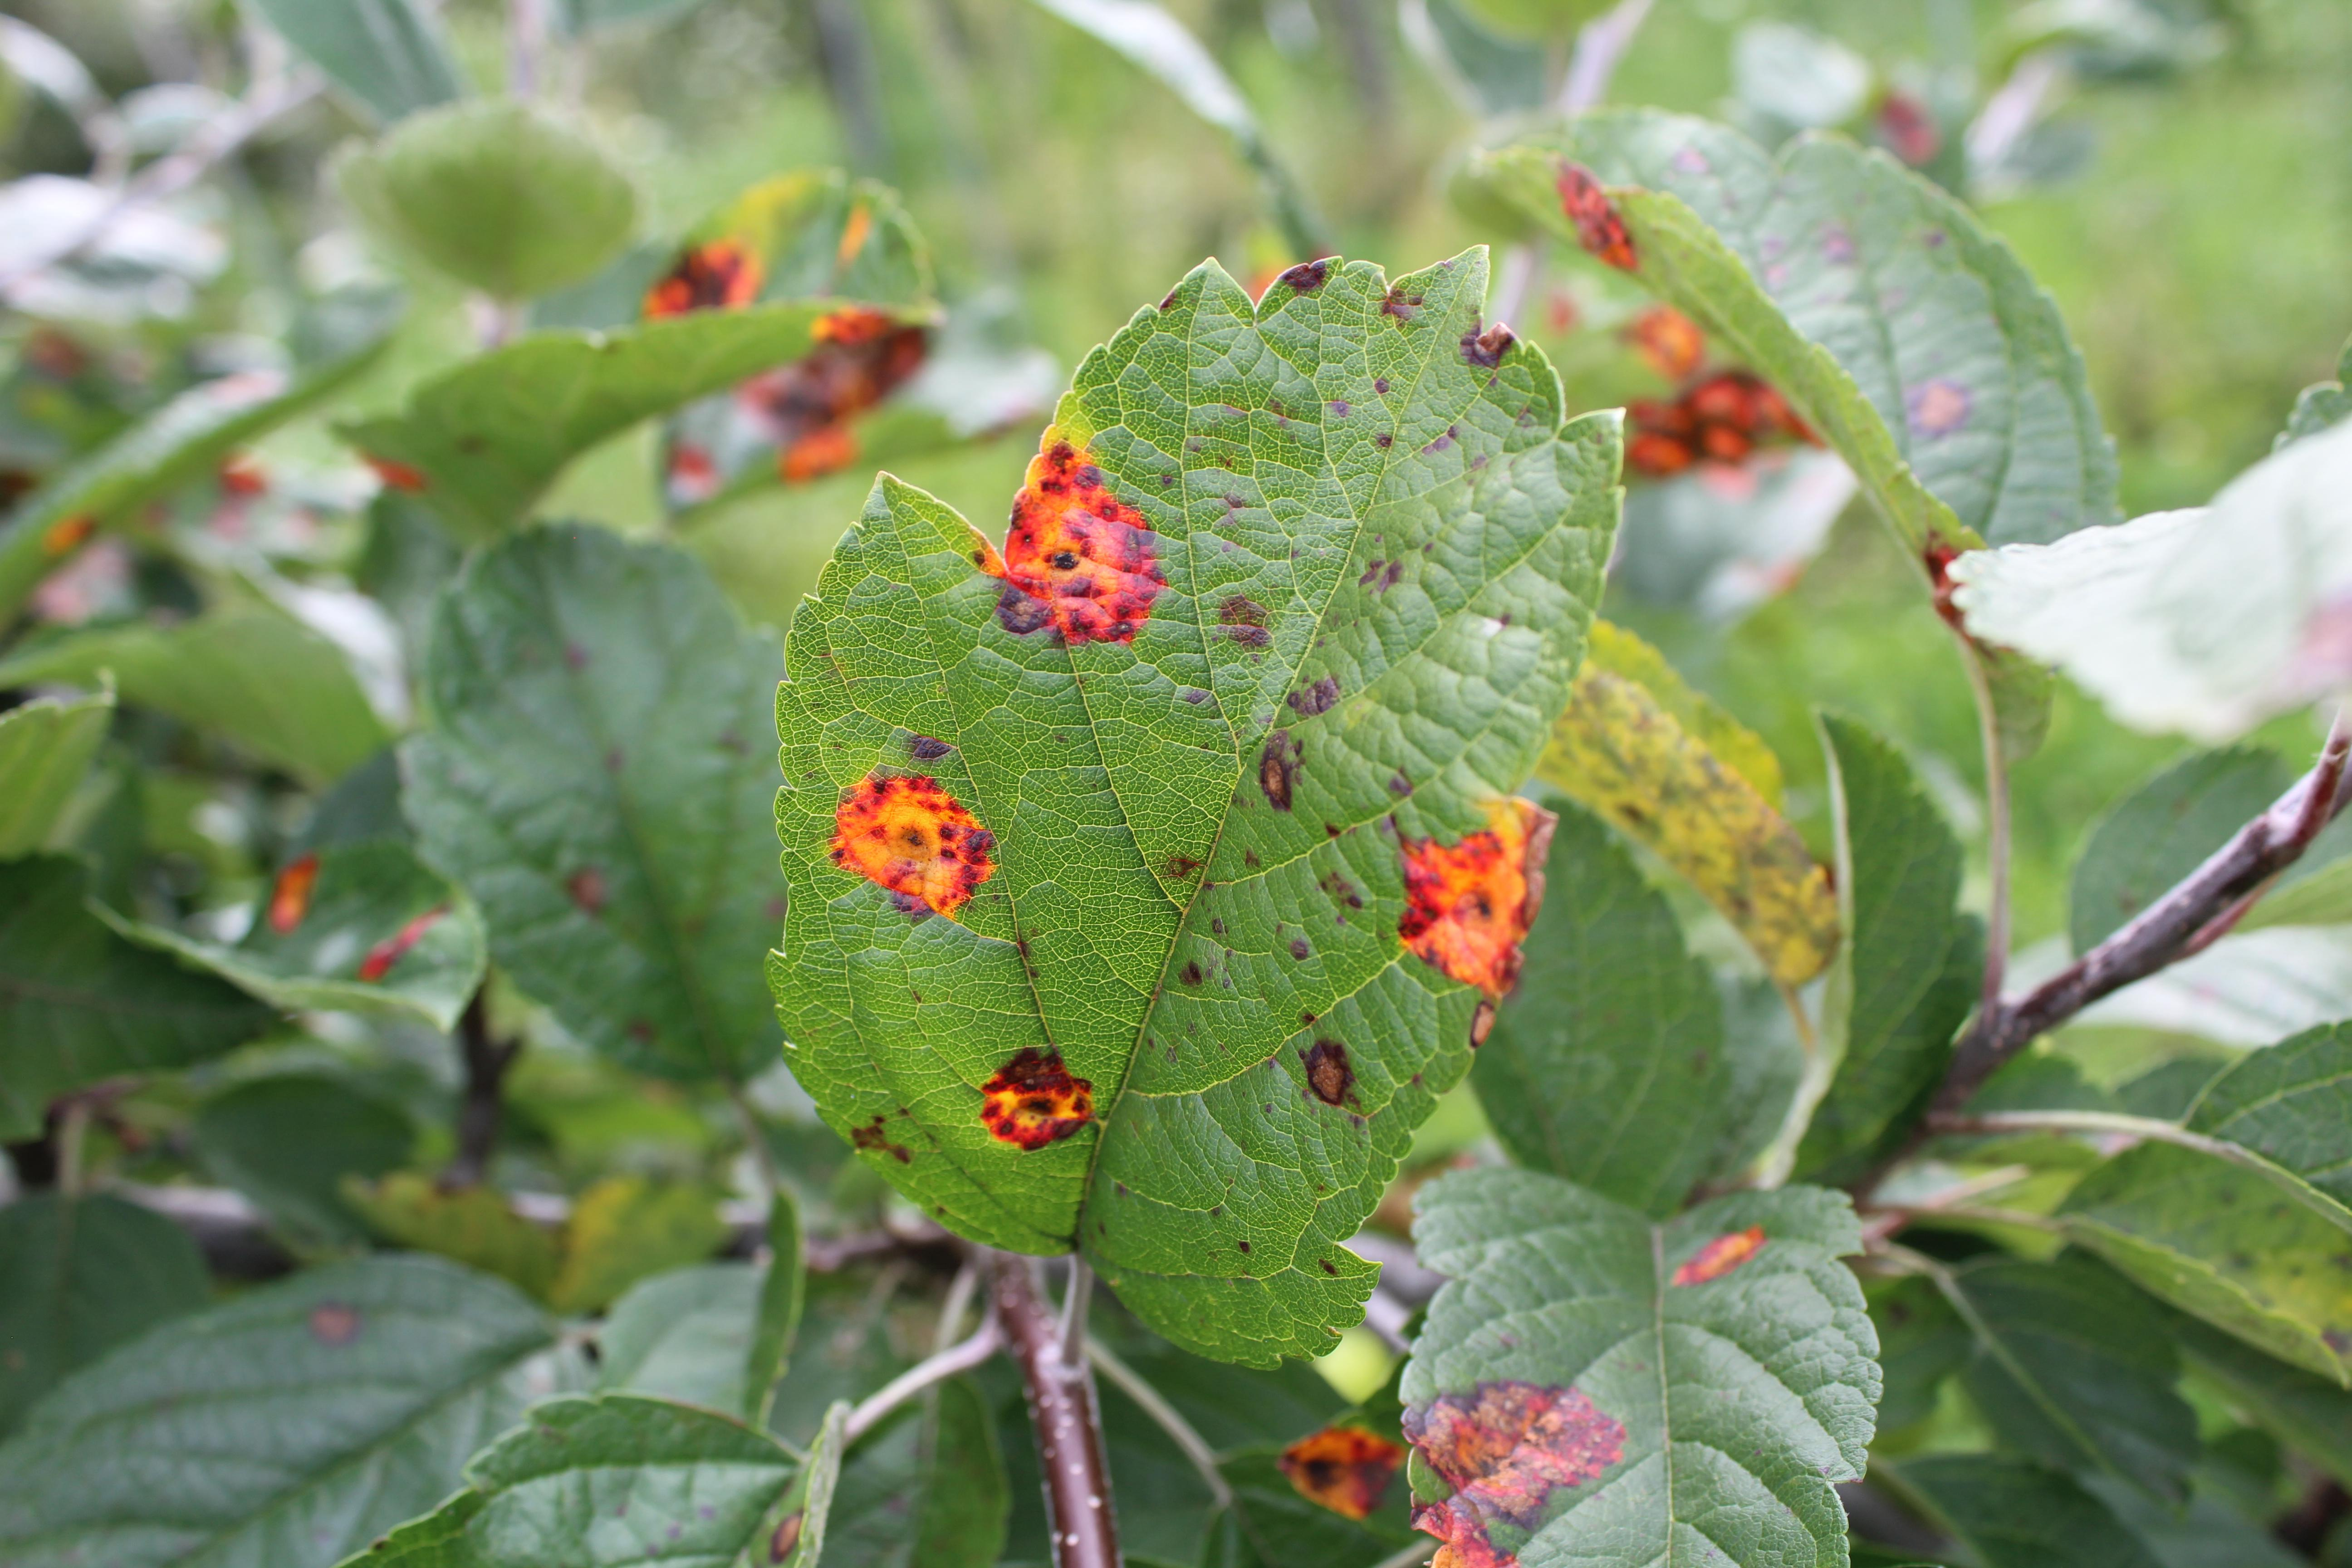

In [3]:
image_path = 'D:\\SAP\\test\\test\\Rust\\82add70df6ab2854.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('D:\\SAP\\Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('D:\\SAP\\Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5


42/42 [==============================] - 453s 11s/step - loss: 1.1622 - accuracy: 0.5098 - val_loss: 0.6171 - val_accuracy: 0.7500
Epoch 2/5
42/42 [==============================] - 357s 8s/step - loss: 0.4684 - accuracy: 0.8200 - val_loss: 0.5408 - val_accuracy: 0.8500
Epoch 3/5
42/42 [==============================] - 395s 9s/step - loss: 0.3348 - accuracy: 0.8843 - val_loss: 0.5714 - val_accuracy: 0.8000
Epoch 4/5
42/42 [==============================] - 426s 10s/step - loss: 0.2921 - accuracy: 0.9009 - val_loss: 0.5250 - val_accuracy: 0.8500
Epoch 5/5
21/42 [==============>...............] - ETA: 3:07 - loss: 0.2589 - accuracy: 0.9108

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('D:\\SAP\\test\\test\\Rust\\82add70df6ab2854.jpg')

In [ ]:
predictions = model.predict(x)
predictions[0]

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)